In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml

In [ ]:
data = fetch_openml("mnist_784") # base de dados escrita a mão
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = data['data']
y = data['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [17]:
X = 255 - X #invertendo as cores

In [21]:
X[X<125] = 0
X[X>=125] = 1

[61268 51914  4302 44863 54510 14021 68914 27778]


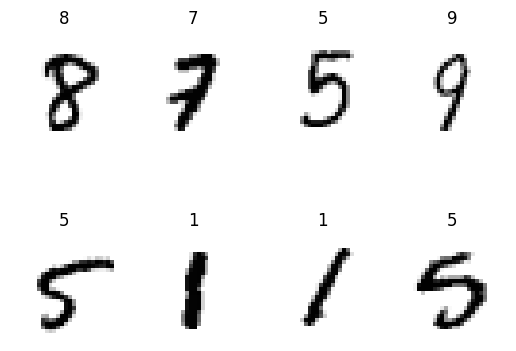

In [ ]:
idxs = np.random.randint(0, 70_000, size=8)
print(idxs)

fig, axs = plt.subplots(2, 4)

for i in range(8):
    img = X.iloc[idxs[i]]
    img_reshape = img.values.reshape(28, 28)
    fig.axes[i].imshow(img_reshape, cmap='gray')
    fig.axes[i].axis('off')
    fig.axes[i].set_title(y.iloc[idxs[i]])
plt.show()

In [22]:
clf = MLPClassifier(
    hidden_layer_sizes=(300, 150, 100, 100),
    verbose = True,
    max_iter = 20,
)
clf.fit(X, y)

Iteration 1, loss = 2.28951495
Iteration 2, loss = 2.26054066
Iteration 3, loss = 2.24292431
Iteration 4, loss = 2.22934708
Iteration 5, loss = 2.21721210
Iteration 6, loss = 2.20464332
Iteration 7, loss = 2.19286725
Iteration 8, loss = 2.18199395
Iteration 9, loss = 2.17271029
Iteration 10, loss = 2.16718875
Iteration 11, loss = 2.16279063
Iteration 12, loss = 2.15994923
Iteration 13, loss = 2.15593991
Iteration 14, loss = 2.15357414
Iteration 15, loss = 2.15220801
Iteration 16, loss = 2.15160629
Iteration 17, loss = 2.15007361
Iteration 18, loss = 2.14915876
Iteration 19, loss = 2.14766895
Iteration 20, loss = 2.14719769


c:\Program Files\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(300, 150, 100, 100), max_iter=20,
              verbose=True)

In [25]:
plt.plot = (clf.loss_curve_)

In [26]:
import pickle

# write binary
with open('model_mlp.pkl', 'wb') as f:
    pickle.dump(clf, f)



In [29]:
with open('model_mlp.pkl', 'rb') as f:
    clf2 = pickle.load(f)

EOFError: Ran out of input